# Partie I: **Description des Donnees**

In [ ]:
#Installation du package Kaggle afin d'importation depuis ce dernier
! pip install -q kaggle

In [ ]:
#creation de dossier kaggle servant a la config
! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
#Insertion des data Kaggle dans le dossier kaggle de config
! cp '/content/drive/MyDrive/Kaggle_db/kaggle.json' ~/.kaggle/

In [ ]:
! #kaggle datasets list

In [ ]:
# Accord des droits du fichier
! chmod 600 ~/.kaggle/

In [ ]:
# Telechargement de la base KDD CUP 99 depuis kaggle
! kaggle datasets download -d galaxyh/kdd-cup-1999-data

kdd-cup-1999-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Dezipper le dossier de la db
! unzip /content/sample_data/kdd-cup-1999-data.zip -d kdd99_db

unzip:  cannot find or open /content/sample_data/kdd-cup-1999-data.zip, /content/sample_data/kdd-cup-1999-data.zip.zip or /content/sample_data/kdd-cup-1999-data.zip.ZIP.


In [ ]:
# Reading Data
import os
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

## import columns names

feature=["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", 
         "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "lnum_compromised", 
         "lroot_shell", "lsu_attempted", "lnum_root", "lnum_file_creations", "lnum_shells", 
         "lnum_access_files", "lnum_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", 
         "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
         "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
         "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", 
         "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"]

In [ ]:
# Manipulation de la db Test
# Import 10% KDDCup99
dbTest = pd.read_csv('/content/drive/MyDrive/Kaggle_db/from_PC/kddcup99_csv.csv', low_memory= False, sep=',')

#Import NSL-KDD dataset
dbTrain = pd.read_csv('/content/drive/MyDrive/Kaggle_db/from_PC/NSL_KDDTrain.txt', delimiter =',', names=feature)
dbTst1 = pd.read_csv('/content/drive/MyDrive/Kaggle_db/from_PC/NSL_KDDTest.txt', names=feature)
dbTst2 = pd.read_csv('/content/drive/MyDrive/Kaggle_db/from_PC/NSL_KDDTest-21.txt', names=feature)

data_nsl = pd.concat([dbTrain, dbTst1, dbTst2], ignore_index=True)
data_nsl.drop(['difficulty'],axis=1,inplace=True)   #delete attribut difficulty before fusion

my_all_data = pd.concat([dbTest, data_nsl], ignore_index=True)

#dbTest.info()

In [ ]:
# Suppression des doubons s'il en existe

my_all_data.drop_duplicates()
dbTest.shape, data_nsl.shape, my_all_data.shape

((494020, 42), (160367, 42), (654387, 42))

In [ ]:
#Visualisation
## definition de fonction de construction de graphique
def bar_graph(table, feature):
    table[feature].value_counts().plot(kind="bar")

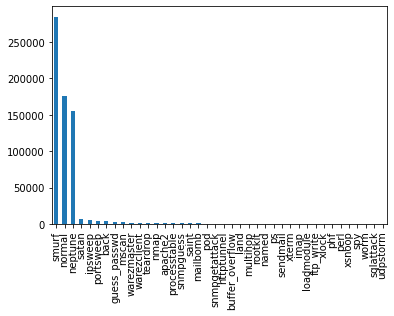

In [ ]:
bar_graph(my_all_data, 'label')

#dbTest['label'].value_counts()

In [ ]:
# Regroupement d'attaques en 4 type
attacks_types = {
  'back'         : 'dos',
  'land'         : 'dos',
  'neptune'      : 'dos',
  'pod'          : 'dos',
  'smurf'        : 'dos',
  'teardrop'     : 'dos',
  'apache2'      : 'dos',
  'mailbomb'     : 'dos',
  'processtable' : 'dos',
  'udpstorm'     : 'dos',
  'worm'         : 'dos',
  'normal'       : 'normal',
  'ipsweep'      : 'probe',
  'nmap'         : 'probe',
  'portsweep'    : 'probe',
  'satan'        : 'probe',
  'mscan'        : 'probe',
  'saint'        : 'probe',
  'ftp_write'    : 'r2l',
  'guess_passwd' : 'r2l',
  'imap'         : 'r2l',
  'multihop'     : 'r2l',
  'phf'          : 'r2l',
  'spy'          : 'r2l',
  'warezclient'  : 'r2l',
  'warezmaster'  : 'r2l',
  'httptunnel'   : 'r2l',
  'named'        : 'r2l',
  'sendmail'     : 'r2l',
  'snmpgetattack': 'r2l',
  'snmpguess'    : 'r2l',
  'xlock'        : 'r2l',
  'xsnoop'       : 'r2l',
  'buffer_overflow' : 'u2r',
  'loadmodule'   : 'u2r',
  'perl'         : 'u2r',
  'rootkit'      : 'u2r',
  'ps'           : 'u2r',
  'sqlattack'    : 'u2r',
  'xterm'        : 'u2r',
}

In [ ]:
# Ajout d'une variable 'type d'attaques' pour faciliter la labellisation

dbTest['Attack_Type'] = dbTest.label.apply(lambda key:attacks_types[key], attacks_types.values())
data_nsl['Attack_Type'] = data_nsl.label.apply(lambda key:attacks_types[key], attacks_types.values())
my_all_data['Attack_Type'] = my_all_data.label.apply(lambda key:attacks_types[key], attacks_types.values())
#my_all_data['Attack_Type'].value_counts()
my_all_data.shape

(654387, 43)

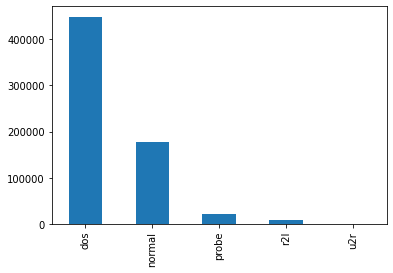

In [ ]:
bar_graph(my_all_data, 'Attack_Type')

# Partie II : **Correlation entre les variables**

<ipython-input-51-e8d5d2c0e0fd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  data_nsl = data_nsl.dropna('columns')
<ipython-input-51-e8d5d2c0e0fd>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  dbTest = dbTest.dropna('columns')
<ipython-input-51-e8d5d2c0e0fd>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  my_all_data = my_all_data.dropna('columns')


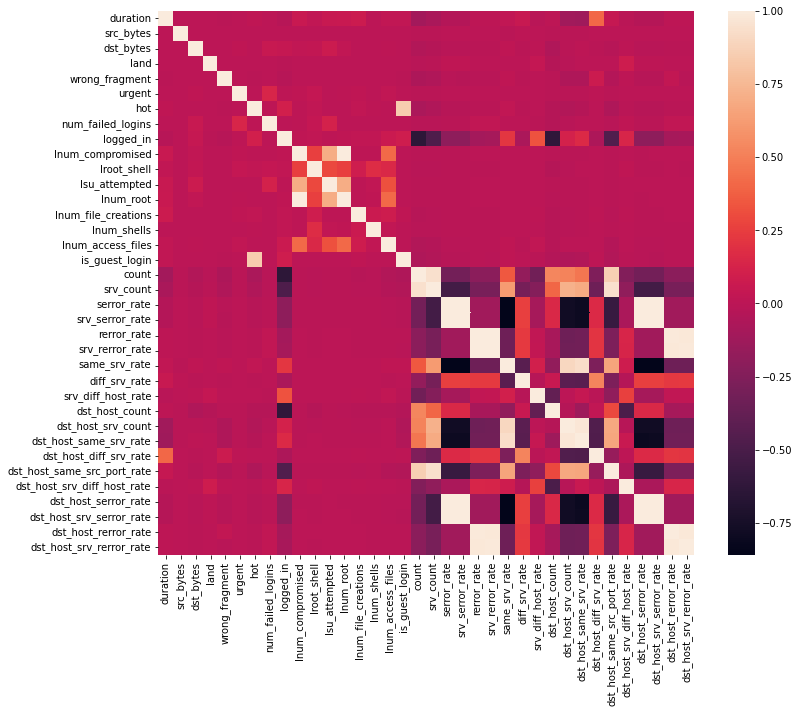

In [ ]:
# drop columns with NaN
data_nsl = data_nsl.dropna('columns')
dbTest = dbTest.dropna('columns')
my_all_data = my_all_data.dropna('columns')

data_nsl = data_nsl[[col for col in data_nsl if data_nsl[col].nunique() > 1]]# keep columns where there are more than 1 unique values
dbTest = dbTest[[col for col in dbTest if dbTest[col].nunique() > 1]]# keep columns where there are more than 1 unique values
my_all_data = my_all_data[[col for col in my_all_data if my_all_data[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = dbTest.corr()

corr_matrix = plt.figure(figsize=(12,10))

sns.heatmap(corr)
corr_matrix.savefig('marice_correlation_curve.jpg', bbox_inches='tight', dpi=150)

plt.show()

In [ ]:
                    #my_all_data
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
my_all_data.drop('lnum_root',axis = 1,inplace = True)

#This variable is highly correlated with hot and should be ignored for analysis.
my_all_data.drop('is_guest_login',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
my_all_data.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with count & srv_count and should be ignored for analysis.
my_all_data.drop('dst_host_same_src_port_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
my_all_data.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
my_all_data.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
my_all_data.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
my_all_data.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with same_srv_rate and should be ignored for analysis.
my_all_data.drop('dst_host_srv_count',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
my_all_data.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
my_all_data.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [ ]:
#Finding categorical features
def find_features_cat(table):
  num_cols = table._get_numeric_data().columns

  cate_cols = list(set(table.columns)-set(num_cols))
  cate_cols.remove('label')
  cate_cols.remove('Attack_Type')

  cate_cols
  print(cate_cols)

In [ ]:
# Affichages des modalites des ces variables qualitatives
dbTest['protocol_type'].value_counts(), dbTest['flag'].value_counts(), dbTest['service'].value_counts()

(icmp    283602
 tcp     190064
 udp      20354
 Name: protocol_type, dtype: int64, SF        378439
 S0         87007
 REJ        26875
 RSTR         903
 RSTO         579
 SH           107
 S1            57
 S2            24
 RSTOS0        11
 S3            10
 OTH            8
 Name: flag, dtype: int64, ecr_i      281400
 private    110893
 http        64292
 smtp         9723
 other        7237
             ...  
 X11            11
 tim_i           7
 pm_dump         1
 tftp_u          1
 red_i           1
 Name: service, Length: 66, dtype: int64)

**Codification des modalites quali en quanti pour les 3 variables ci-dessus afin de preparer la modelisation**

In [ ]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
data_nsl['protocol_type'] = data_nsl['protocol_type'].map(pmap)
dbTest['protocol_type'] = dbTest['protocol_type'].map(pmap)
my_all_data['protocol_type'] = my_all_data['protocol_type'].map(pmap)

In [ ]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
data_nsl['flag'] = data_nsl['flag'].map(fmap)
dbTest['flag'] = dbTest['flag'].map(fmap)
my_all_data['flag'] = my_all_data['flag'].map(fmap)

In [ ]:
# Suppression de la variable Service (Trop de modalites a codifier)
data_nsl.drop('service',axis = 1,inplace= True)
dbTest.drop('service',axis = 1,inplace= True)
my_all_data.drop('service',axis = 1,inplace= True)

In [ ]:
# Consulter les types restant dans la base
#dbTest.dtypes

# Partie III: **Modelisation des Donnees**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler #Transformation des matrice
from sklearn.metrics import accuracy_score, f1_score

# Pour Implementer le NB
from sklearn.naive_bayes import GaussianNB

# Pour Implementer l'arbre de Decision
from sklearn.tree import DecisionTreeClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Regression Logistique
from sklearn.linear_model import LogisticRegression

# KNN
from sklearn.neighbors import KNeighborsClassifier

# ANN
from keras.models import Sequential
from keras.layers import Dense, Embedding, Bidirectional
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator

# LSTM
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# CNN
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# MLP
from sklearn.neural_network import MLPClassifier

# SVM
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score # Pour la table de classification
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
import joblib # for save models
import time

In [ ]:
# Firt Hyperparametre
  # label variable and train set
def func_split_db(table) :
  db_quant = table.drop(['label',], axis=1)

  Y = db_quant['Attack_Type']
  X = db_quant.drop(['Attack_Type',], axis=1)

  sc = MinMaxScaler(feature_range=(0, 1))
  X = sc.fit_transform(X)

  # Split test and train data 
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
  print(X_train.shape, X_test.shape)
  print(Y_train.shape, Y_test.shape)

In [ ]:
#func_split_db(data_nsl)
func_split_db(my_all_data)
#func_split_db(my_all_data)

(458070, 28) (196317, 28)
(458070,) (196317,)


In [ ]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=1,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

In [ ]:
db_head = ['dos','normal', 'probe','r2l','u2']

def construct_conf_matrix(feature):
    conf_matrix = metrics.confusion_matrix(Y_test, feature, labels=None, sample_weight=None, normalize='true')
    cm_display = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels = db_head)

    fig, ax = plt.subplots(figsize=(7,8))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [ ]:
def evaluation_model(model, Y_pred):    
    #print(construct_conf_matrix(Y_pred))
    rapport = print(classification_report(Y_test, Y_pred))

    N, train_score, val_score = learning_curve(model, X_train, Y_train, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1, 24))
    
    fig = plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='test score')
    plt.legend()
    model_name = type(model).__name__
    fig.savefig(model_name + '_curve.jpg', bbox_inches='tight', dpi=150)
    plt.show()

In [ ]:
epochs = 50  # for better result increase the epochs
batch_size = 100
def courbe_de_perte(model):
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                                  epochs = epochs, validation_data = (X_test,Y_test), steps_per_epoch=X_train.shape[0] // batch_size)
    # Plot the loss and accuracy curves for training and validation 
    plt.plot(history.history['val_loss'], color='b', label="validation loss")
    plt.title("Test Loss")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# **Shallow Learning, Supervised Methods**

# 1. **Application NB**


In [ ]:
model_nb = GaussianNB()

# Temps d'entrainement
start_time = time.time()
model_nb.fit(X_train, Y_train.values.ravel())
end_time = time.time()

#print("Training time: ",end_time-start_time)

In [ ]:
# save model
fn_nb = "naive_bayes.joblib"
#joblib.dump(model_nb, fn_nb)

In [ ]:
# load model & curve
loaded_model_nb = joblib.load('/content/drive/MyDrive/Save_models/'+ fn_nb)

In [ ]:
# Temps de Test
start_time = time.time()
Y_test_pred_nb = loaded_model_nb.predict(X_test)
end_time = time.time()

#print("Testing time: ",end_time-start_time)

In [ ]:
# Score de NB
nb_train_score = loaded_model_nb.score(X_train, Y_train)
nb_test_score = loaded_model_nb.score(X_test,Y_test)

print("Train score is:", nb_train_score)
print("Test score is:", nb_test_score)

Train score is: 0.8783825987380499
Test score is: 0.8790399848859021


In [ ]:
# Taux d'erreur avec la Matrice de confusion
#construct_conf_matrix(Y_test_pred_nb)

              precision    recall  f1-score   support

         dos       0.98      0.94      0.96    117447
      normal       0.97      0.64      0.77     29154
       probe       0.09      0.99      0.17      1238
         r2l       0.30      0.38      0.34       349
         u2r       0.00      0.67      0.01        18

    accuracy                           0.88    148206
   macro avg       0.47      0.72      0.45    148206
weighted avg       0.97      0.88      0.91    148206



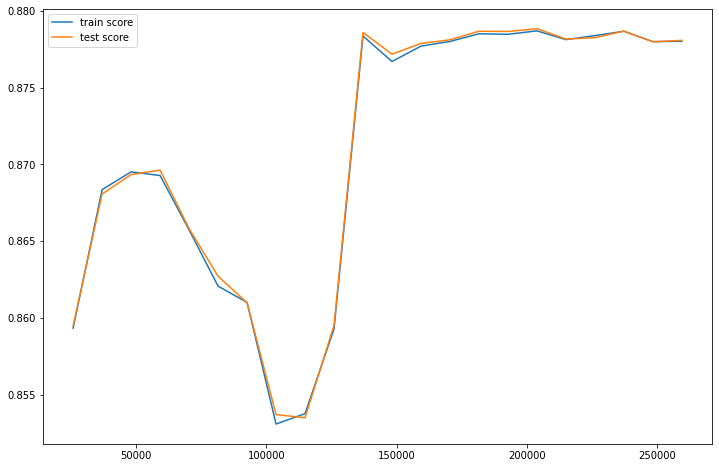

In [ ]:
evaluation_model(loaded_model_nb, Y_test_pred_nb)

# 2. **Application de l'Arbre de Decision**

In [ ]:
model_dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

# Temps Training
start_time = time.time()
model_dt.fit(X_train, Y_train.values.ravel())
end_time = time.time()

#print("Training time: ",end_time-start_time)

In [ ]:
# save model
fn_dt = "decision_tree.joblib"
#joblib.dump(model_dt, fn_dt)

['decision_tree.joblib']

In [ ]:
# load model & curve
loaded_model_dt = joblib.load(fn_dt)

In [ ]:
# Temps de Test
start_time = time.time()
Y_test_pred_dt = loaded_model_dt.predict(X_test)
end_time = time.time()

#print("Testing time: ",end_time-start_time)

In [ ]:
# Score de DT
dt_train_score = loaded_model_dt.score(X_train, Y_train)
dt_test_score = loaded_model_dt.score(X_test,Y_test)

print("Train score is:", dt_train_score)
print("Test score is:", dt_test_score)

Train score is: 0.990581642154453
Test score is: 0.990526699323914


In [ ]:
# Taux d'erreur avec la Matrice de confusion
#construct_conf_matrix(Y_test_pred_dt)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    117447
      normal       0.98      0.98      0.98     29154
       probe       0.56      0.88      0.68      1238
         r2l       0.00      0.00      0.00       349
         u2r       0.00      0.00      0.00        18

    accuracy                           0.99    148206
   macro avg       0.51      0.57      0.53    148206
weighted avg       0.99      0.99      0.99    148206



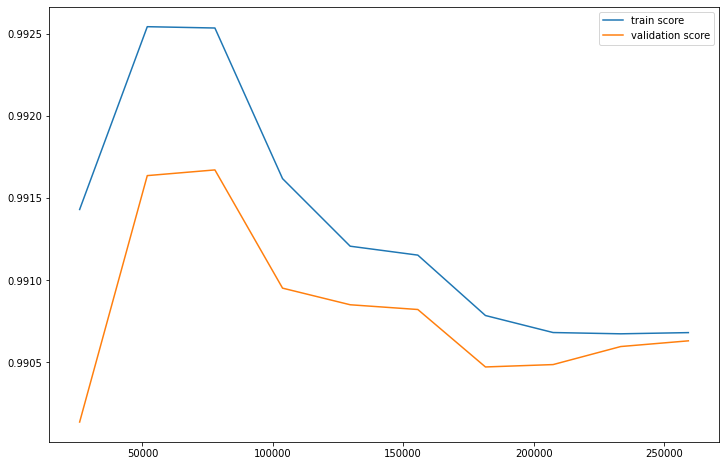

In [ ]:
evaluation_model(loaded_model_dt, Y_test_pred_dt)

# 3. **Application RANDOM FOREST**

In [ ]:
model_rf = RandomForestClassifier(n_estimators=30)

# Temps de Training
start_time = time.time()
model_rf.fit(X_train, Y_train.values.ravel())
end_time = time.time()

#print("Training time: ",end_time-start_time)

NameError: ignored

In [ ]:
# save model
fn_rf = "random_forest.joblib"
#joblib.dump(model_rf, fn_rf)

['random_forest.joblib']

In [ ]:
# load model & curve
loaded_model_rf = joblib.load(fn_rf)

In [ ]:
# Temps de Test
start_time = time.time()
Y_test_pred_rf = loaded_model_rf.predict(X_test)
end_time = time.time()

#print("Testing time: ",end_time-start_time)

In [ ]:
# Score de RF
rf_train_score = loaded_model_rf.score(X_train, Y_train)
rf_test_score = loaded_model_rf.score(X_test,Y_test)

print("Train score is:", rf_train_score)
print("Test score is:", rf_test_score)

Train score is: 0.9999826496324614
Test score is: 0.9996288949165351


In [ ]:
# Taux d'erreur avec la Matrice de confusion
#construct_conf_matrix(Y_test_pred_rf)

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    117447
      normal       1.00      1.00      1.00     29154
       probe       0.99      0.99      0.99      1238
         r2l       0.99      0.95      0.97       349
         u2r       0.93      0.72      0.81        18

    accuracy                           1.00    148206
   macro avg       0.98      0.93      0.95    148206
weighted avg       1.00      1.00      1.00    148206



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

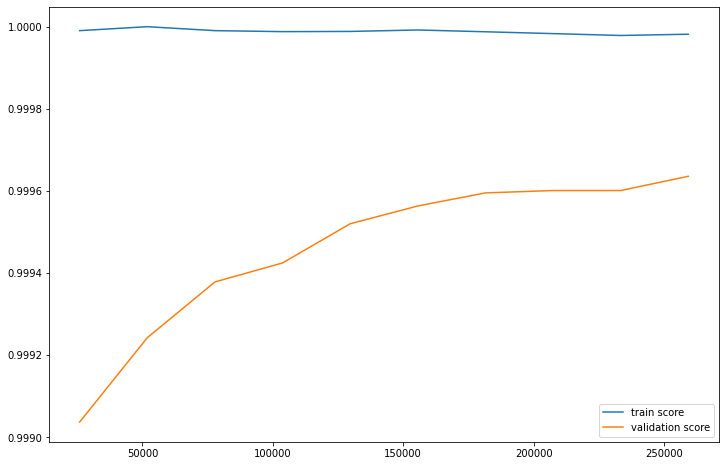

In [ ]:
evaluation_model(loaded_model_rf, Y_test_pred_rf)

# 4. **Regression Logistique**

In [ ]:
model_rl = LogisticRegression(max_iter=600000)

# Temps de Training
start_time = time.time()
model_rl.fit(X_train, Y_train.values.ravel())
end_time = time.time()

#print("Training time: ",end_time-start_time)

In [ ]:
# save model
fn_rl = "regres_logist.joblib"
#joblib.dump(model_rl, fn_rl)

['regres_logist.joblib']

In [ ]:
# load model & curve
loaded_model_rl = joblib.load(fn_rl)

In [ ]:
# Temps de Test
start_time = time.time()
Y_test_pred_rl = loaded_model_rl.predict(X_test)
end_time = time.time()

#print("Testing time: ",end_time-start_time)

In [ ]:
# Score de RL
rl_train_score = loaded_model_rl.score(X_train, Y_train)
rl_test_score = loaded_model_rl.score(X_test,Y_test)

print("Train score is:", rl_train_score)
print("Test score is:", rl_test_score)

Train score is: 0.9934704783496331
Test score is: 0.9936169925644036


In [ ]:
# Taux d'erreur avec la Matrice de confusion
#construct_conf_matrix(Y_test_pred_rl)

              precision    recall  f1-score   support

         dos       1.00      0.99      1.00    117447
      normal       0.97      1.00      0.98     29154
       probe       0.98      0.88      0.93      1238
         r2l       0.86      0.83      0.84       349
         u2r       0.89      0.44      0.59        18

    accuracy                           0.99    148206
   macro avg       0.94      0.83      0.87    148206
weighted avg       0.99      0.99      0.99    148206



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

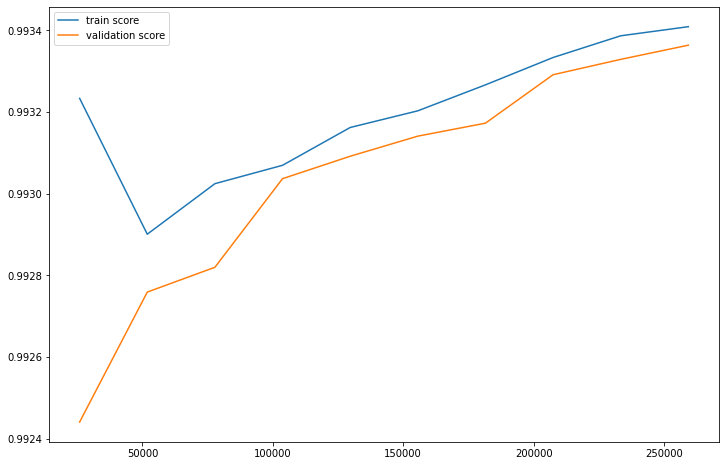

In [ ]:
evaluation_model(loaded_model_rl, Y_test_pred_rl)

# 5. **K-Nearest Neighbor**

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=20).fit(X_train, Y_train.values.ravel())

# Determiner le temps d'entrainement
start_time = time.time()
model_knn.fit(X_train, Y_train.values.ravel())
end_time = time.time()

#print("Training time: ",end_time-start_time)

In [ ]:
# save model
fn_knn = "knn.joblib"
#joblib.dump(model_knn, fn_knn)

['knn.joblib']

In [ ]:
# load model & curve
loaded_model_knn = joblib.load(fn_knn)

In [ ]:
# Temps de Test
start_time = time.time()
Y_test_pred_knn = loaded_model_knn.predict(X_test)
end_time = time.time()

#print("Testing time: ",end_time-start_time)

In [ ]:
# Score de KNN
knn_train_score = loaded_model_knn.score(X_train, Y_train)
knn_test_score = loaded_model_knn.score(X_test,Y_test)

print("Train score is:", knn_train_score)
print("Test score is:", knn_test_score)

Train score is: 0.9987623404489119
Test score is: 0.9986302848737568


In [ ]:
# Taux d'erreur avec la Matrice de confusion
#construct_conf_matrix(Y_test_pred_knn)

In [ ]:
evaluation_model(loaded_model_knn, Y_test_pred_knn)

# 6. **Application SVM**

(1) With First parameter

In [ ]:
model_svm = SVC(gamma = 'scale')

# Determiner le temps d'entrainement
start_time = time.time()
model_svm.fit(X_train, Y_train.values.ravel())
end_time = time.time()

#print("Training time: ",end_time-start_time)

In [ ]:
# save model
fn_svm = "svm.joblib"
#joblib.dump(model_svm, fn_svm)

['svm.joblib']

In [ ]:
# load model & curve
loaded_model_svm = joblib.load(fn_svm)

In [ ]:
# Temps de Test
start_time = time.time()
Y_test_pred_svm = loaded_model_svm.predict(X_test)
end_time = time.time()

#print("Testing time: ",end_time-start_time)

In [ ]:
# Affichage des Scores
svm_train_score = loaded_model_svm.score(X_train, Y_train)
svm_test_score = loaded_model_svm.score(X_test,Y_test)

print("Train score is:", svm_train_score)
print("Test score is:", svm_test_score)

Train score is: 0.9987334231696808
Test score is: 0.9987719795419888


In [ ]:
# Taux d'erreur avec la Matrice de confusion
#construct_conf_matrix(Y_test_pred_svm)

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    117447
      normal       1.00      1.00      1.00     29154
       probe       0.99      0.96      0.98      1238
         r2l       0.89      0.87      0.88       349
         u2r       0.77      0.56      0.65        18

    accuracy                           1.00    148206
   macro avg       0.93      0.88      0.90    148206
weighted avg       1.00      1.00      1.00    148206



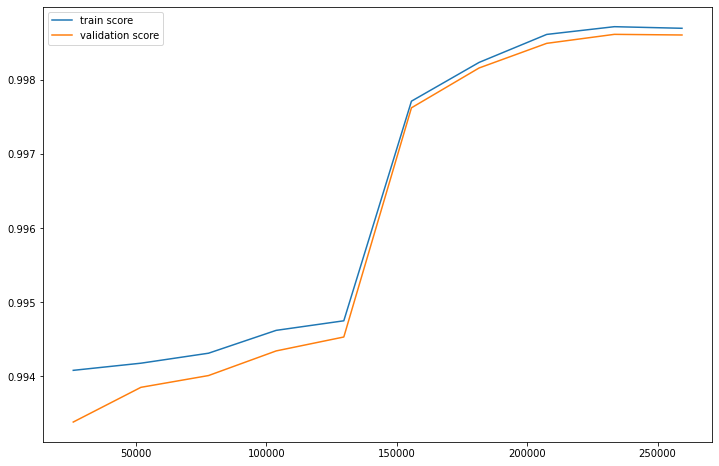

In [ ]:
evaluation_model(loaded_model_svm, Y_test_pred_svm)

# **Deep Learning, Supervised Methods**

# 1. **Artificial Neural Network**

In [ ]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [ ]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed. 
#Once we are done with one batch it is flushed from memory and the next batch will be processed.

model_ann = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

# Temps de Training
start = time.time()
model_ann.fit(X_train, Y_train.values.ravel())
end = time.time()

#print("Training time :", (end-start))

In [ ]:
# save model
fn_ann = "ann.joblib"
#joblib.dump(model_ann, fn_ann)

['ann.joblib']

In [ ]:
# load model & curve
loaded_model_ann = joblib.load(fn_ann)

In [ ]:
# Temps de Test
start_time = time.time()
Y_test_pred_ann = loaded_model_ann.predict(X_test)
end_time = time.time()

#print("Testing time: ",end_time-start_time)

4632/4632 [==============================] - 6s 1ms/step


In [ ]:
# Score de ANN
start_time = time.time()
Y_train_pred_ann = loaded_model_ann.predict(X_train)
end_time = time.time()

10807/10807 [==============================] - 15s 1ms/step


In [ ]:
# Taux d'erreur avec la Matrice de confusion
#construct_conf_matrix(Y_test_pred_ann)

In [ ]:
# Score de ANN Final
ann_train_score = accuracy_score(Y_train, Y_train_pred_ann)
ann_test_score = accuracy_score(Y_test,Y_test_pred_ann)

print("Train score is:", ann_train_score)
print("Test score is:", ann_test_score)

Train score is: 0.9925538005980094
Test score is: 0.9924564457579316


In [ ]:
evaluation_model(loaded_model_ann, Y_test_pred_ann)

In [ ]:
courbe_de_perte(loaded_model_ann)

In [ ]:
enc = LabelEncoder()
y = enc.fit_transform(dbTest['Attack_Type'])
x = np.arange(y.shape[0])

class_labels = pd.DataFrame(data=enc.classes_,columns=['class'])
class_labels['label'] = np.unique(y)
display(class_labels)

# **Comparaison des differentes Precisions des differents Algos**

In [ ]:
# Build Table
  
fig = go.Figure(data=[go.Table(header=dict(values=['NB','DT','RF','RL','KNN', 'SVM','ANN']),
                 cells=dict(values=[[nb_train_score, dt_train_score, rf_train_score, rl_train_score, knn_train_score,svm_train_score, ann_train_score], 
                                    [nb_test_score, dt_test_score, rf_test_score, rl_test_score, knn_test_score, svm_test_score, ann_test_score]]))
                  ])
# display table
fig.update_layout(width=9900, height=500)
fig.show()

In [ ]:
# Precision lors du Training
names = ['NB','DT','RF','RL','KNN', 'SVM','ANN']
values = [nb_train_score,dt_train_score,rf_train_score,rl_train_score,knn_train_score,svm_train_score,ann_train_score]
fig_train_compar = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)
fig_train_compar.savefig('training_accuracy_figure.png',bbox_inches='tight')

In [ ]:
# Precision lors du Test
names = ['NB','DT','RF','RL','KNN', 'SVM','ANN']
values = [nb_test_score,dt_test_score,rf_test_score,rl_test_score,knn_test_score,svm_test_score,ann_test_score]
fig_test_compar = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)
fig_test_compar.savefig('test_accuracy_figure.png',bbox_inches='tight')